Shown below is the parameters input to log_likelihood() as well as the likelihood they give out.

Currently varying Omega_m
0: [0.0, 0.7, 75, -19.2] --> -235.711
0: [0.05, 0.7, 75, -19.2] --> -162.647
0: [0.1, 0.7, 75, -19.2] --> -107.086
0: [0.15, 0.7, 75, -19.2] --> -66.67
0: [0.2, 0.7, 75, -19.2] --> -39.566
0: [0.25, 0.7, 75, -19.2] --> -24.302
0: [0.3, 0.7, 75, -19.2] --> -19.666
0: [0.35, 0.7, 75, -19.2] --> -24.644
0: [0.4, 0.7, 75, -19.2] --> -38.369
0: [0.45, 0.7, 75, -19.2] --> -60.098
0: [0.5, 0.7, 75, -19.2] --> -89.182
0: [0.55, 0.7, 75, -19.2] --> -125.053
0: [0.6, 0.7, 75, -19.2] --> -167.206
0: [0.65, 0.7, 75, -19.2] --> -215.195
0: [0.7, 0.7, 75, -19.2] --> -268.617
0: [0.75, 0.7, 75, -19.2] --> -327.111
0: [0.8, 0.7, 75, -19.2] --> -390.352
0: [0.85, 0.7, 75, -19.2] --> -458.041
0: [0.9, 0.7, 75, -19.2] --> -529.91
0: [0.95, 0.7, 75, -19.2] --> -605.71

Currently varying Omega_L
1: [0.3, 0.0, 75, -19.2] --> -585.375
1: [0.3, 0.05, 75, -19.2] --> -515.861
1: [0.3, 0.1,

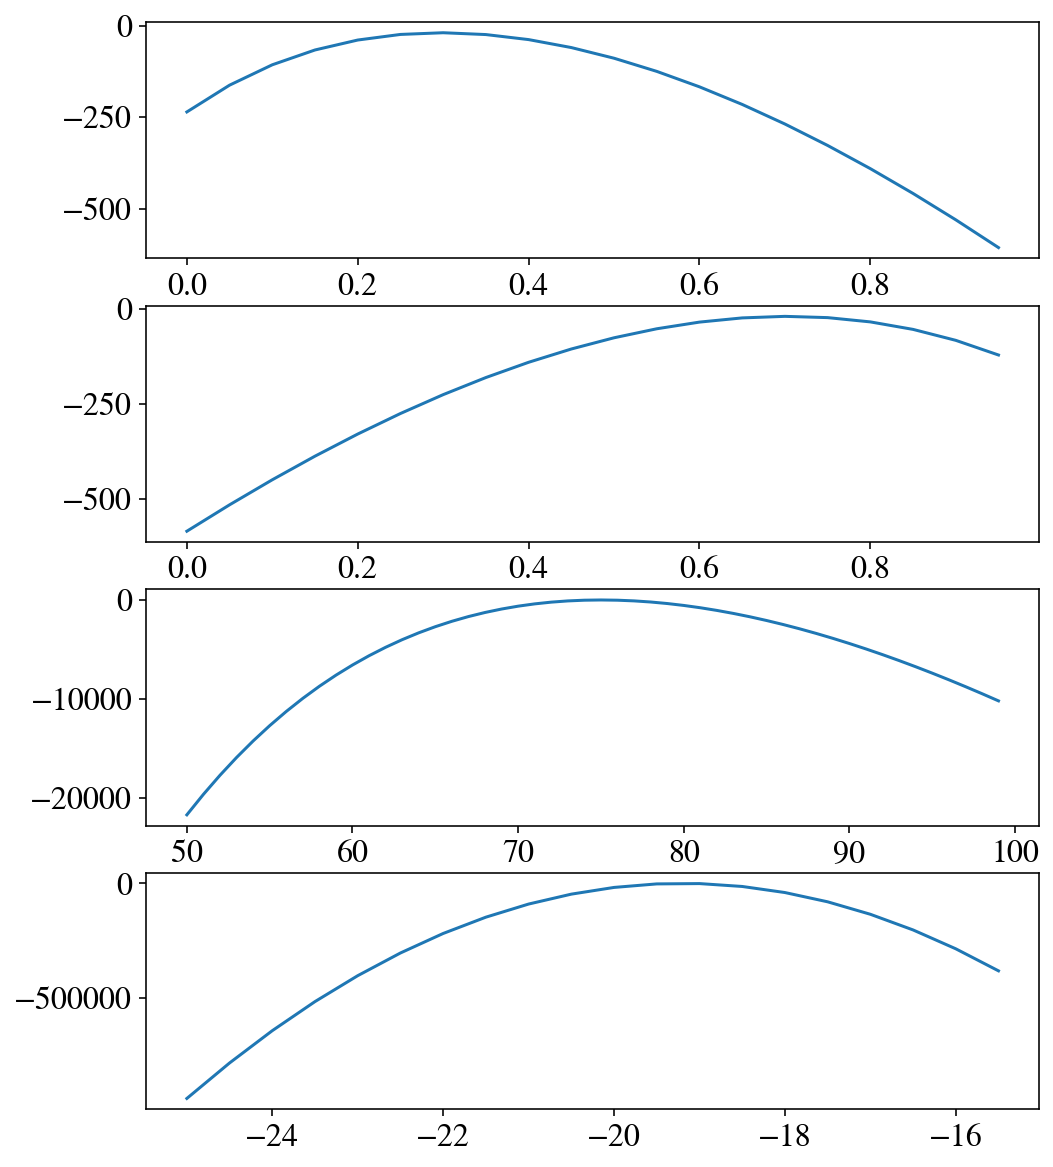

In [7]:
import itertools
import os

import matplotlib.figure
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from source.mcmc import MCMC

from source.mcmc_state import State

debug = False  # set to True to print all data points

def setup_chain():
    %config InlineBackend.figure_format = 'retina'
    font = {'size'   : 16, 'family':'STIXGeneral'}
    axislabelfontsize='medium'
    matplotlib.rc('font', **font)
    matplotlib.mathtext.rcParams['legend.fontsize']='medium'
    plt.rcParams["figure.figsize"] = [8.0, 10.0]

    datadir = os.path.join(basedir, 'data')

    binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
    binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')
    # start = [np.random.uniform(0, 1),  # Omega_m
    #          np.random.uniform(0,1),  # Omega_L
    #          np.random.uniform(50,100),  # H0
    #          np.random.uniform(-25, -15)]  # M
    start = [0.3, 0.70, 75, -19.2]

    g_cov_test = np.diag([.01, .01, .1, .01])
    markov_chain = MCMC(initial_state=start,
                        data_file=binned_data_file,
                        systematics_file=binned_sys_file,
                        g_cov=g_cov_test)

    return markov_chain, start

markov_chain, start = setup_chain()

def main():
    def map_likelihood(arg: int):
        """
        Map the argument in start parameter assuming the others
        :param arg:
        :return:
        """
        if arg == 0 or arg == 1:
            min_value = 0
            max_value = 1
            step = 0.05
            if arg == 0:
                variable = "Omega_m"
            else:
                variable = "Omega_L"
        elif arg == 2:
            min_value = 50
            max_value = 100
            step = 1
            variable = "H0"
        elif arg == 3:
            min_value = -25
            max_value = -15
            step = 0.5
            variable = "M"
        else:
            raise ValueError
        
        likelihood_x = np.around(np.arange(min_value, max_value, step), decimals=2)
        likelihood_y = []
        if debug:
            print()
            print(f"Currently varying {variable}")
        for i in likelihood_x:
            input = [start[0], start[1], start[2], start[3]]
            input[arg] = i
            state = State(input)
            l = markov_chain.log_likelihood(state.tuple)
            print(f"{arg}: {input} --> {round(l, 3)}")
            likelihood_y.append((state.tuple, l))
            
        return likelihood_x, likelihood_y

    fig, ax = plt.subplots(4, 1)

    print("Shown below is the parameters input to log_likelihood() as well as the likelihood they give out.")
    for i in range(4):
        x, y = map_likelihood(i)
        y = [i[1] for i in y]
        ax[i].plot(x, y)

    if debug:
        plt.show()

if __name__ == "__main__":
    debug = True
    main()

/home/rhensley/.local/lib/python3.8/site-packages/astropy/cosmology/flrw.py:1072: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._inv_efunc_scalar, z1, z2, args=self._inv_efunc_scalar_args)[0]
/home/rhensley/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)
/home/rhensley/.local/lib/python3.8/site-packages/astropy/cosmology/flrw.py:1072: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(self._inv_efunc_scalar, z1, z2, args=self._inv_efunc_scalar_args)[0]
/home/rhensley/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: divide by zero encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)


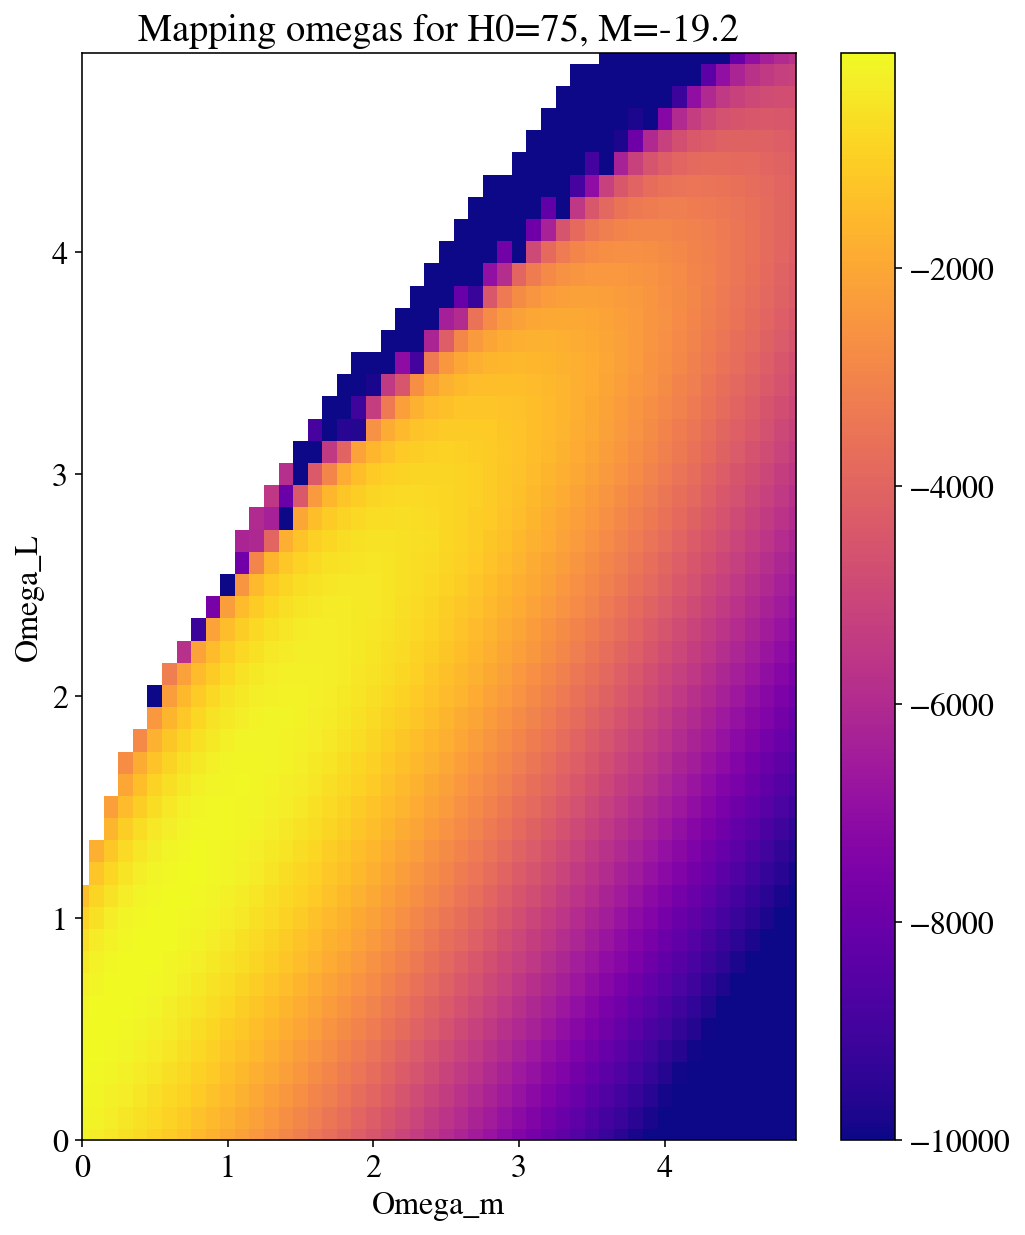

In [8]:
def map_omegas(max_x1, step_x1, max_x2, step_x2):
    x1 = np.arange(0, max_x1, step_x1)
    x2 = np.arange(0, max_x2, step_x2)
    y = np.zeros((len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            input = [x1_value, x2_value, start[2], start[3]]
            state = State(input)
            l = markov_chain.log_likelihood(state.array)
            # print(f"{input} --> {round(l, 3)}")
            # y.append((state.tuple, l))
            y[j][i] = l

    fig, ax = plt.subplots()
    fig: matplotlib.figure.Figure
    ax: plt.Axes  # just typehinting
    c = ax.pcolormesh(x1, x2, y,
                      cmap='plasma', shading='auto',
                      vmin=-10000)
    ax.axis([x1.min(), x1.max(), x2.min(), x2.max()])
    fig.colorbar(c, ax=ax)
    ax.set_xlabel("Omega_m")
    ax.set_ylabel("Omega_L")
    ax.set_title("Mapping omegas for H0=75, M=-19.2")

    plt.show()

if __name__ == "__main__":
    map_omegas(5, 0.1, 5, 0.1)

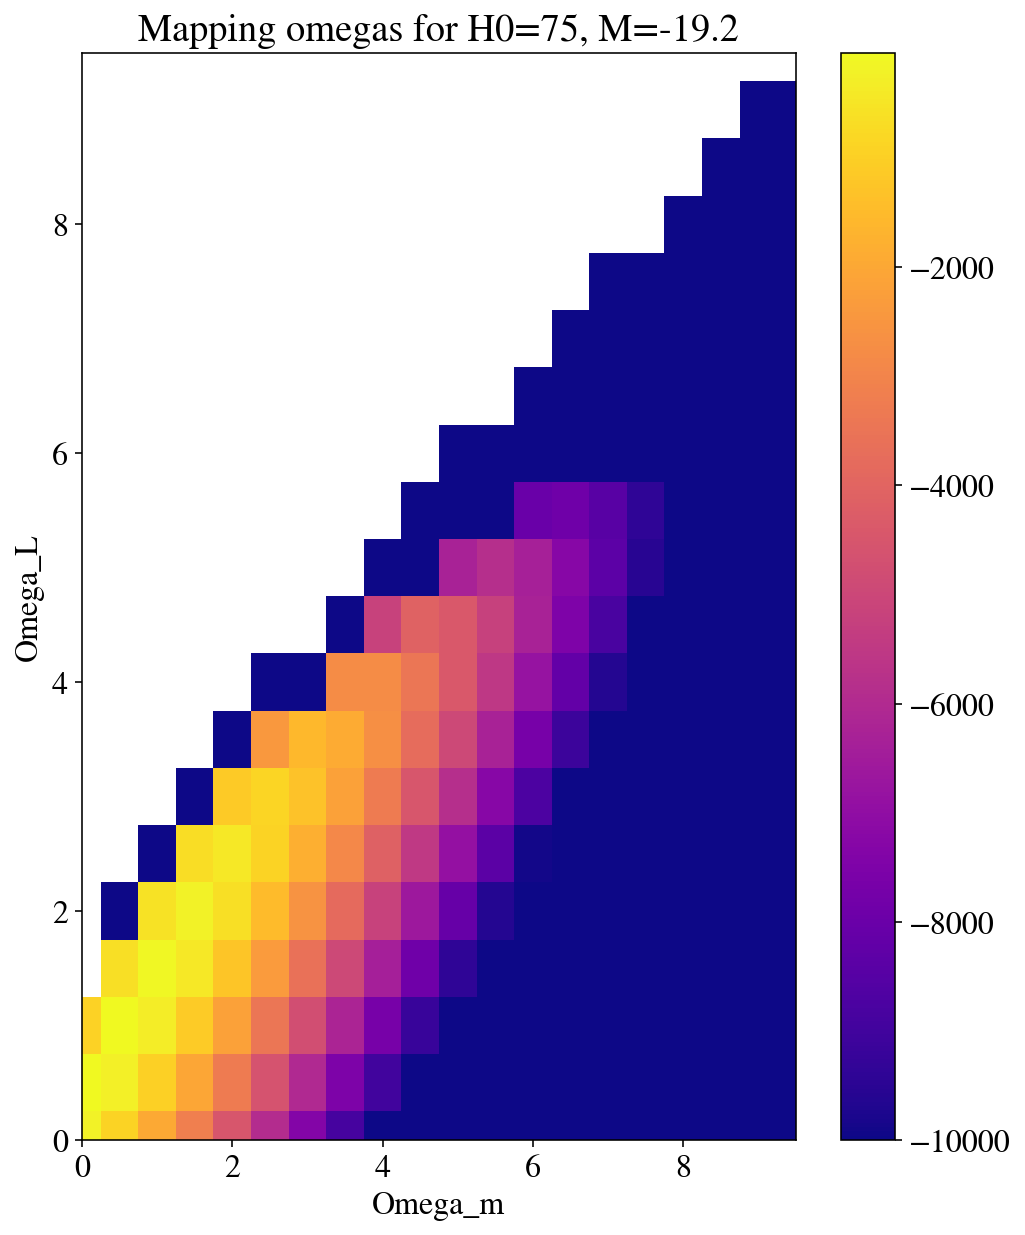

In [10]:
if __name__ == "__main__":
    map_omegas(10, 0.5, 10, 0.5)
    pass